In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Load dataset
df = pd.read_csv("/content/drive/MyDrive/final_destination.csv")

#prepare the data
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')
data = df[['Open', 'High', 'Low', 'Close']].values
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)
def create_sequences(data, time_steps=60):
    X, y = [], []
    for i in range(time_steps, len(data)):
        X.append(data[i-time_steps:i])
        y.append(data[i, 3])
    return np.array(X), np.array(y)

time_steps = 60
X, y = create_sequences(scaled_data, time_steps)
train_size = int(0.8 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

#model creation
model = Sequential([
    GRU(100, return_sequences=False, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.2),
    Dense(1)
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')
model.summary()

#Early stopping
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True,
    verbose=1
)

#train the model
history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    shuffle=False,
    callbacks=[early_stop]
)

#prediction
predicted = model.predict(X_test)


#inverse the scale
scaled_close = np.zeros((len(predicted), 4))
scaled_close[:, 3] = predicted[:, 0]
predicted_price = scaler.inverse_transform(scaled_close)[:, 3]

actual_close = scaler.inverse_transform(np.concatenate(
    [np.zeros((len(y_test), 3)), y_test.reshape(-1, 1)], axis=1)
)[:, 3]
plt.figure(figsize=(12,6))
plt.plot(actual_close, color='black', label='Actual Close Price')
plt.plot(predicted_price, color='green', label='Predicted Close Price')
plt.title('GRU Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

last_60_days = scaled_data[-60:]

X_input = np.expand_dims(last_60_days, axis=0)

predicted_scaled = model.predict(X_input)

dummy = np.zeros((1, 4))
dummy[0, 3] = predicted_scaled[0, 0]
predicted_price = scaler.inverse_transform(dummy)[0, 3]

print(f"Predicted Close Price for 2025-10-17: ₹{predicted_price:.2f}")

model.save('GRUu.keras')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Processing company: tata
Epoch 1/100


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 64ms/step - loss: 0.0061 - val_loss: 0.0122
Epoch 2/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - loss: 0.0054 - val_loss: 0.0025
Epoch 3/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - loss: 0.0037 - val_loss: 0.0010
Epoch 4/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - loss: 0.0034 - val_loss: 5.2959e-04
Epoch 5/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - loss: 0.0033 - val_loss: 5.2067e-04
Epoch 6/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 77ms/step - loss: 0.0026 - val_loss: 6.9490e-04
Epoch 7/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 73ms/step - loss: 0.0017 - val_loss: 5.2091e-04
Epoch 8/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - loss: 0.0010 - val_loss: 5.7725e-04
Epoch 9/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - loss: 8.5037e-04 - val_loss: 4.7494e-04
Epoch 10/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - loss: 7.8929e-04 - val_loss: 0.0011
Epoch 11/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - loss: 8.8886e-04 - val_loss: 6.8982e-04
Epoch 12/100
24/24 ━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 73ms/step - loss: 0.0094 - val_loss: 0.0078
Epoch 2/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 81ms/step - loss: 0.0233 - val_loss: 0.0025
Epoch 3/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 76ms/step - loss: 0.0126 - val_loss: 7.8650e-04
Epoch 4/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - loss: 0.0075 - val_loss: 0.0018
Epoch 5/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - loss: 0.0031 - val_loss: 7.9477e-04
Epoch 6/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - loss: 0.0029 - val_loss: 7.1847e-04
Epoch 7/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - loss: 0.0022 - val_loss: 7.5838e-04
Epoch 8/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - loss: 0.0021 - val_loss: 6.8827e-04
Epoch 9/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - loss: 0.0018 - val_loss: 6.7051e-04
Epoch 10/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - loss: 0.0018 - val_loss: 7.0999e-04
Epoch 11/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - loss: 0.0018 - val_loss: 8.1136e-04
Epoch 12/100
24/24 ━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 81ms/step - loss: 0.0527 - val_loss: 0.0015
Epoch 2/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - loss: 0.0099 - val_loss: 0.0012
Epoch 3/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - loss: 0.0016 - val_loss: 9.1957e-04
Epoch 4/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - loss: 0.0026 - val_loss: 7.2291e-04
Epoch 5/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - loss: 0.0012 - val_loss: 0.0021
Epoch 6/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - loss: 0.0025 - val_loss: 9.3530e-04
Epoch 7/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - loss: 0.0011 - val_loss: 6.0895e-04
Epoch 8/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - loss: 8.4167e-04 - val_loss: 6.6482e-04
Epoch 9/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 71ms/step - loss: 0.0011 - val_loss: 0.0025
Epoch 10/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 76ms/step - loss: 0.0018 - val_loss: 6.6653e-04
Epoch 11/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - loss: 8.0065e-04 - val_loss: 6.0720e-04
Epoch 12/100
24/24 ━━━━━━━━━

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


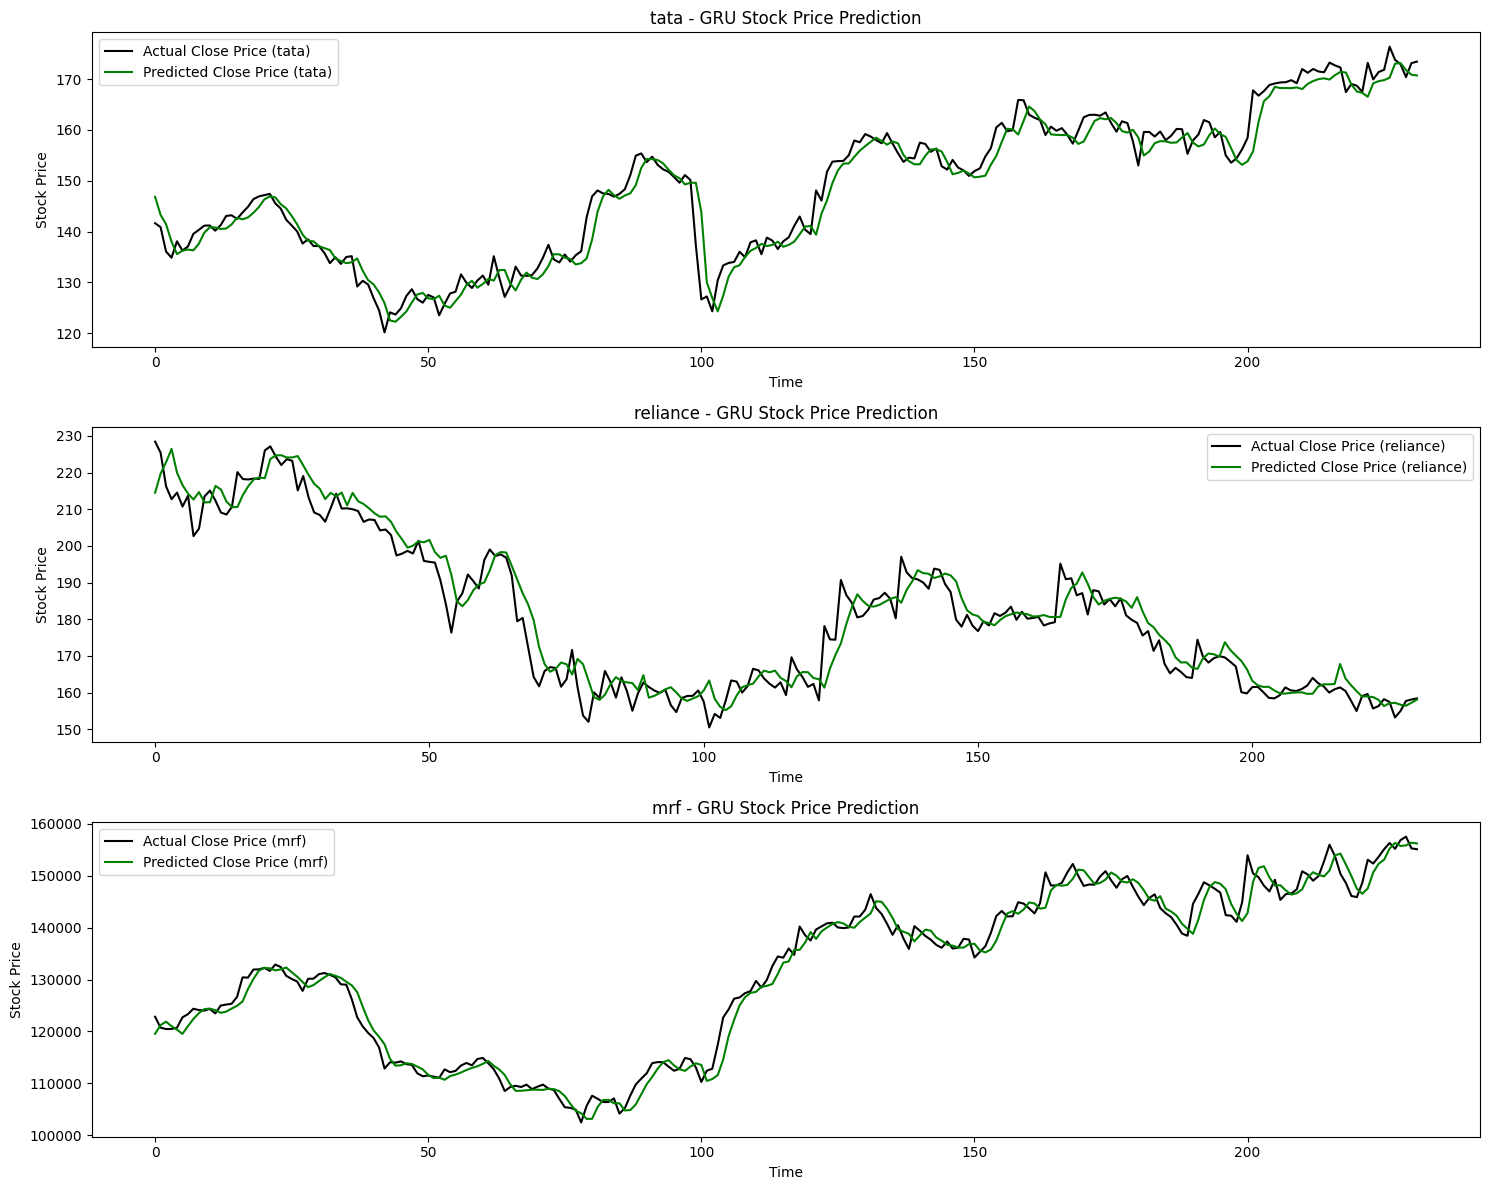

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Load dataset
df = pd.read_csv("/content/drive/MyDrive/Mumbai_Hacks/final_destination.csv")

# Convert 'Date' to datetime and sort
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')

# Get unique companies
companies = df['company'].unique()

# Function to create sequences for the model
def create_sequences(data, time_steps=60):
    X, y = [], []
    for i in range(time_steps, len(data)):
        X.append(data[i-time_steps:i])
        y.append(data[i, 3])  # 'Close' is at index 3
    return np.array(X), np.array(y)

# Set up plotting for all companies
plt.figure(figsize=(15, 12))

# Loop through each company and train/predict separately
for company in companies:
    print(f"Processing company: {company}")

    # Filter data for the current company
    company_data = df[df['company'] == company]
    data = company_data[['Open', 'High', 'Low', 'Close']].values

    # Scale the data
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(data)

    # Create sequences for the model
    X, y = create_sequences(scaled_data, time_steps=60)

    # Split the data into training and testing sets
    train_size = int(0.8 * len(X))
    X_train, X_test = X[:train_size], X[train_size:]
    y_train, y_test = y[:train_size], y[train_size:]

    # Create and compile the GRU model
    model = Sequential([
        GRU(100, return_sequences=False, input_shape=(X_train.shape[1], X_train.shape[2])),
        Dropout(0.2),
        Dense(1)
    ])
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

    # Early stopping
    early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, verbose=1)

    # Train the model
    history = model.fit(
        X_train, y_train,
        epochs=100,
        batch_size=32,
        validation_split=0.2,
        shuffle=False,
        callbacks=[early_stop]
    )

    # Make predictions
    predicted = model.predict(X_test)

    # Inverse scale the predictions
    scaled_close = np.zeros((len(predicted), 4))
    scaled_close[:, 3] = predicted[:, 0]
    predicted_price = scaler.inverse_transform(scaled_close)[:, 3]

    actual_close = scaler.inverse_transform(np.concatenate(
        [np.zeros((len(y_test), 3)), y_test.reshape(-1, 1)], axis=1)
    )[:, 3]

    # Plot the results for the current company
    plt.subplot(len(companies), 1, np.where(companies == company)[0][0] + 1)
    plt.plot(actual_close, color='black', label=f'Actual Close Price ({company})')
    plt.plot(predicted_price, color='green', label=f'Predicted Close Price ({company})')
    plt.title(f'{company} - GRU Stock Price Prediction')
    plt.xlabel('Time')
    plt.ylabel('Stock Price')
    plt.legend()

    # Save the model for the current company
    model.save(f'GRU_{company}.keras')

# Show the plot
plt.tight_layout()
plt.show()


In [ ]:
for company in companies:
    print(f"Processing company: {company} for future prediction")

    # Filter data for the current company
    company_data = df[df['company'] == company]
    data = company_data[['Open', 'High', 'Low', 'Close']].values

    # Scale the data
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(data)

    # Get the last 60 days of data for prediction
    last_60_days = scaled_data[-60:]

    # Expand dimensions to match the model's input shape
    X_input = np.expand_dims(last_60_days, axis=0)

    # Load the trained model for this company
    # model = load_model(f'GRU_{company}.keras')

    # Make the prediction for the next day (17-10-2025)
    predicted_scaled = model.predict(X_input)

    # Inverse scale the predicted price
    dummy = np.zeros((1, 4))
    dummy[0, 3] = predicted_scaled[0, 0]
    predicted_price = scaler.inverse_transform(dummy)[0, 3]

    # Print the predicted price for 17th October 2025
    print(f"Predicted Close Price for {company} on 17th October 2025: ₹{predicted_price:.2f}")

Processing company: tata for future prediction
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Predicted Close Price for tata on 17th October 2025: ₹173.19
Processing company: reliance for future prediction
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Predicted Close Price for reliance on 17th October 2025: ₹154.92
Processing company: mrf for future prediction
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
Predicted Close Price for mrf on 17th October 2025: ₹155912.70


In [ ]:
X_test

array([[[0.77498774, 0.78051571, 0.7865876 , 0.79504311],
        [0.80468484, 0.78541894, 0.81147802, 0.79651085],
        [0.79901128, 0.77931437, 0.79799225, 0.78220912],
        ...,
        [0.62209927, 0.6222426 , 0.63734909, 0.63711259],
        [0.64739523, 0.62899822, 0.63974214, 0.63208905],
        [0.63629812, 0.61812298, 0.61159993, 0.6153711 ]],

       [[0.80468484, 0.78541894, 0.81147802, 0.79651085],
        [0.79901128, 0.77931437, 0.79799225, 0.78220912],
        [0.79200416, 0.77562085, 0.78791231, 0.78274658],
        ...,
        [0.64739523, 0.62899822, 0.63974214, 0.63208905],
        [0.63629812, 0.61812298, 0.61159993, 0.6153711 ],
        [0.62583659, 0.65299715, 0.63732525, 0.65269448]],

       [[0.79901128, 0.77931437, 0.79799225, 0.78220912],
        [0.79200416, 0.77562085, 0.78791231, 0.78274658],
        [0.78240503, 0.77212518, 0.78495682, 0.77147539],
        ...,
        [0.63629812, 0.61812298, 0.61159993, 0.6153711 ],
        [0.62583659, 0.652997